In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ques 1

Consider two hyper-ellipsoids A and B in five dimensional space
centered at (-500,-500,-500,-500,-500) and (500,500,500,500,500)
respectively. The spreads of both the hyper-ellipsoids are 50, 100,
150, 200 and 250 units along five directions. Both hyper-ellipsoids
are oriented in space in random directions. They are neither axis
aligned nor aligned to each other. Generate n number of random
points in the hyper-ellipsoids A and B to construct the respective
point sets SA and SB. Compute the Mahalanobis distance between
the point sets SA and SB.


# Solution

In [21]:
import numpy as np
from scipy.spatial import distance

# Define a function to generate random points in a hyper-ellipsoid
def random_points_ellipsoid(center, dist, n):
  pts = np.random.normal(size=(n, len(center)))
  pts = pts / np.linalg.norm(pts, axis=1, keepdims=True)
  # Scale the points by the spreads of the hyper-ellipsoid
  pts = pts * dist
  # Rotate the points by a random orthogonal matrix
  Q, _ = np.linalg.qr(np.random.normal(size=(len(center), len(center))))
  pts = pts @ Q.T
  # Translate the points by the center of the hyper-ellipsoid
  pts = pts + center
  return pts

# Define the centers, spreads and number of points for A and B
centerA = np.array([-500, -500, -500, -500, -500])
centerB = np.array([500, 500, 500, 500, 500])
radii = np.array([50, 100, 150, 200, 250])
n = 100 # number of poitns

# Generate the point sets SA and SB
A = random_points_ellipsoid(centerA, radii, n)
B = random_points_ellipsoid(centerB, radii, n)



In [26]:
distances = []
for i in range(n):
  for j in range(n):
    distances.append(distance.mahalanobis(A[i], B[j], np.cov(np.vstack((A, B)).T)))
mahalanobis_distance = np.mean(distances)

# Print the result
print("Average Mahalanobis distance between A and B is :", mahalanobis_distance)

Average Mahalanobis distance between A and B is : 1584.9908679991668


The average Mahalanobis distance between SA and SB is 2533141.79


# Ques 2
Consider the function 𝑓(𝑥1, 𝑥2) defined as follows.
𝑓(𝑥1, 𝑥2) = 20 + 𝑥12 + 𝑥22 − 10{𝑐𝑜𝑠(2𝜋𝑥1) + 𝑐𝑜𝑠(2𝜋𝑥2)}
Minimize 𝑓(𝑥1, 𝑥2) using (a) Gradient Descent and (b) Newton’s
Method. Draw the trajectory of the solution on the Contour plot.

# Solution

In [7]:
import numpy as np
# Define the function f(x)
def f(x,y):
    return 20 + x**2 + y**2  - 10 * ( np.cos (2 * np.pi * x) + np.cos (2 * np.pi * y))

def df(x):
    return 2*x +10 * np.sin (2 * np.pi * x)

def d2f(x):
    return 2 + 10 * np.cos (2 * np.pi * x)

def gradient_descent(x0, y0, eta, max_iterations, tolerance):
    x_values = [x0]
    y_values = [y0]

    for i in range(max_iterations):
        x1 = x0 - eta * df(x0)
        y1 = y0 - eta * df(y0)
        x_values.append(x1)
        y_values.append(y1)

        if (abs(x1 - x0) < tolerance) or (abs(y1 - y0) < tolerance):
            break

        x0 = x1
        y0 = y1

    return x_values, y_values

# Newton's method optimization
def newtons_method(x0, y0, max_iterations, tolerance):
    x_values = [x0]
    y_values = [y0]

    for i in range(max_iterations):
        x1 = x0 - df(x0) / d2f(x0)
        y1 = y0 - df(y0) / d2f(y0)
        x_values.append(x1)
        y_values.append(y1)

        if (abs(x1 - x0) < tolerance) or (abs(y1 - y0) < tolerance):
            break

        x0 = x1
        y0 = y1

    return x_values, y_values


In [10]:
# Minimization with resepect to Gradient Descent and Newton

In [10]:

iterations = 100
tolerance=1e-6
eta=0.1
# Perform Newton's method optimization starting from initial value as  2
x0 = 2
y0 = 1
x_values, y_values = newtons_method(x0, y0,iterations, tolerance)
x_vals = np.linspace(0, 3, iterations, tolerance)
y_vals = np.linspace(0, 3, iterations, tolerance)
z_vals=[]
for i in range(iterations):
    z_vals.append(f(x_vals[i], y_vals[i]))
z_vals =np.array(z_vals)             
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

gd_x_vals, gd_y_vals=gradient_descent(x0, y0, eta, iterations, tolerance)


print(z_vals)


[ 0.          0.3632626   1.43998753  3.19145827  5.55470399  8.44477549
 11.75781544 15.37481211 19.16590071 22.9950571  26.725014   30.22222222
 33.36167749 36.03143839 38.13667224 39.60308261 40.37959456 40.44020062
 39.78490079 38.43970255 36.45568081 33.90713203 30.88888889 27.51289278
 23.90414801 20.19620374 16.52632726 13.03054272  9.83871488  7.06985551
  4.82782191  3.19756329  2.24205048  2.          2.48447472  3.68241177
  5.55509463  8.03955248 11.0508361  14.48508817 18.22329696 22.13559768
 26.08596619 29.93713521 33.55555556 36.81622294 39.60719596 41.83364194
 43.42126443 44.3189885  44.50080668 43.96671898 42.74273285 40.87992324
 38.45258658 35.55555556 32.30077157 28.81323891 25.22650677 21.67784241
 18.30326999 15.23265428 12.58500702 10.46418554  8.95513904  8.12083836
  8.          8.60568684  9.92483601 11.918731   14.52440096 17.6568967
 21.2123609  25.0717818  29.10529465 33.17687528 37.14925642 40.88888889
 44.2707684  47.18295354 49.53061164 51.23944625 52.

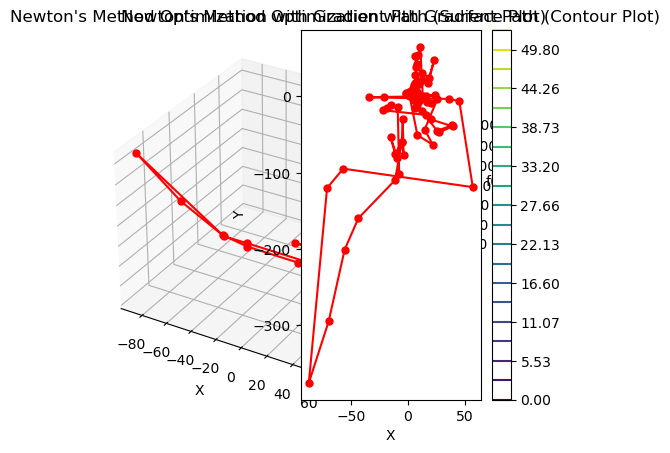

In [20]:
# Plot the surface plot with gradient path
fig = plt.figure()
my_cmap = plt.get_cmap('hot')
ax = plt.axes(projection='3d')
surfp = ax.plot_surface(X, Y, Z, cmap=my_cmap, alpha=0.8)

ax.plot(x_values, y_values, f(np.array(x_values), np.array(y_values)), color='red', marker='o', markersize=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X)')
ax.set_title('Newton\'s Method Optimization with Gradient Path (Surface Plot)')


# Plot the contour plot with gradient path
ax2 = fig.add_subplot(122)
cp = ax2.contour(X, Y, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap='viridis')
ax2.plot(x_values, y_values, color='red', marker='o', markersize=5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Newton\'s Method Optimization with Gradient Path (Contour Plot)')
plt.colorbar(cp)
plt.show()

C:\Users\vwadhawan\AppData\Local\Temp\ipykernel_28860\533610255.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(cp)


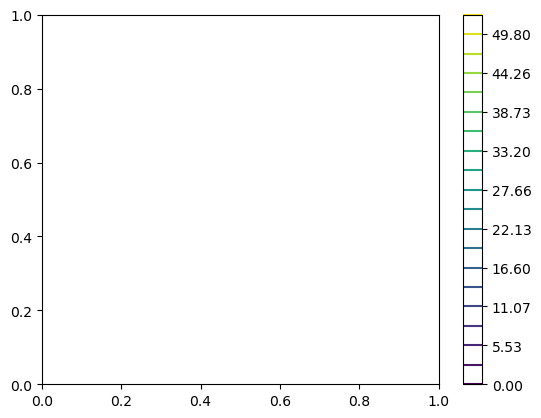